In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
# %matplotlib inline

In [2]:
X = pd.read_excel('q3-data/data_h.xlsx', header=None).to_numpy()

Cluster Distance computation: The class below enables the formation of distance/similarity matrix between the sample elements. Some methods of the class are used to compute distance based on certain criterion because after some iteration in Hierarchial clustering, we will have to compute distances between samples and clusters and between two clusters and so on.

In [3]:
class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

Implementing the clustering method: We now implement the clustering method and we keep on printing the clusters formed after each iteration. This will be used to verify the clustering done from our implementation of agglomerative clustering with single linkage with other modules available

In [4]:
# progression = [[i] for i in range(X.shape[0])]
# samples     = [[list(X[i])] for i in range(X.shape[0])]
# m = len(samples)
# distcal  = Distance_computation_grid()

# print(progression)
# while m>len(samples)-3:
#     print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
#     print('Sample size before clustering    :- ',m)
#     Distance_mat      = distcal.compute_distance(samples)
#     sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
#     value_to_add      = samples.pop(sample_ind_needed[1])
#     samples[sample_ind_needed[0]].append(value_to_add)
    
# #     print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
# #     print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
#     progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
#     progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
#     v = progression.pop(sample_ind_needed[1])
#     m = len(samples)
    
#     print(progression)
    
# #     print('Progression(Current Sample)      :-',progression)
# #     print('Cluster attained                 :-',progression[sample_ind_needed[0]])
# #     print('Sample size after clustering     :-',m)
# #     print('\n')

Final Comments on our implementation: We used the single linkage in our case, We can modify the existing code to implement complete linkage and ward's methods as well

TOP DOWN APPROACH

In [11]:
def TopDown(current, counter):
    ans = []
    kmeans = KMeans(n_clusters=2)
    for c in current:
        kmeans.fit(c)
        left, right = c[kmeans.labels_ == 0], c[kmeans.labels_ == 1]
        ans.append(left)
        ans.append(right)
        
    for idx, data in enumerate(ans):
        axs[counter].scatter(data[:, 0], data[:, 1], color=colors[idx + 1], label=idx)
#         axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
        axs[counter].set_title(f'{idx}', loc='left')
        axs[counter].set_xlabel('x')
        axs[counter].set_ylabel('y')
        axs[counter].legend(loc='lower right')
    
    return ans

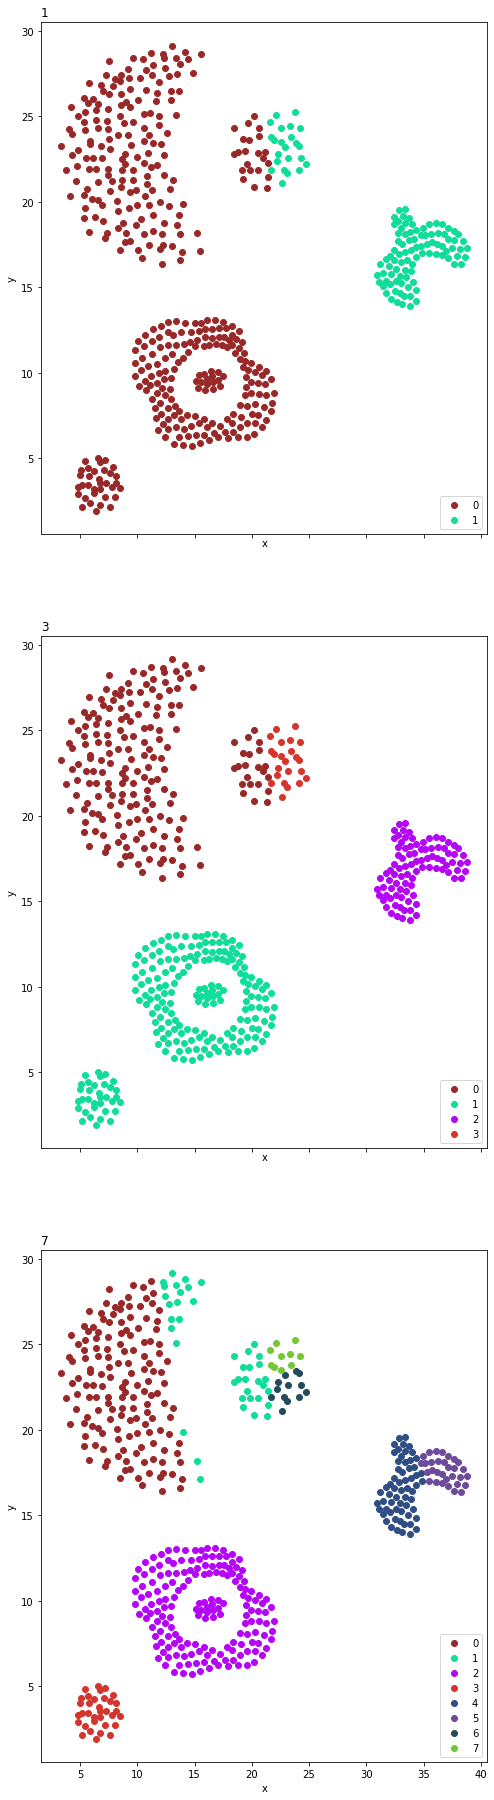

In [16]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(8, 32), sharex=True, sharey=True)
rgen = np.random.RandomState(42)
colors = rgen.rand(9,3)

current = []
current.append(X)


counter = 0
while True:
    current = TopDown(current, counter)
    counter += 1
    if len(current) >= 8:
        break


# for idx, data in enumerate(current):
#     axs[idx].scatter(data[:, 0], data[:, 1], color=colors[idx + 1], label=idx)
#     axs[idx].scatter(X[:, 0], X[:, 1], color=colors[0], label='X')
#     axs[idx].set_title(f'{idx}', loc='left')
#     axs[idx].set_xlabel('x')
#     axs[idx].set_ylabel('y')
#     axs[idx].legend(loc='lower right')

In [17]:
a = []
b = np.array([1, 2])
c = np.array([3, 4])
a.append([b])
a.append([c])
print(a)

[[array([1, 2])], [array([3, 4])]]
